<a href="https://colab.research.google.com/github/grupos4g4/AED/blob/main/Aplicando_Aula_7_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando Conhecimento Aula 7 - Base de dados Grupo 3: Global Crop Yields (Brazil)
##Alunos:
###Anderson Aparecido Alves
###Andréia dos Santos
###Gerson Soares Rodrigues
###Samuel Bonfim


Importação das Bibliotecas a que poderão ser utilizadas

In [34]:
# Importação das Bibliotecas a serem Utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files

Importação dos arquivos em formato csv para a criar os DataFrames necessários

In [35]:
df_key_crop_yields = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/key_crop_yields.csv')
df_fertilizer = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/cereal_crop_yield_vs_fertilizer_application.csv')
df_tractors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/cereal_yields_vs_tractor_inputs_in_agriculture.csv')
df_land_use = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/land_use_vs_yield_change_in_cereal_production.csv')
df_arable_land = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-01/arable_land_pin.csv')



####  Principais rendimentos das colheitas em escala mundial

Valores brutos do dataframe dos principais rendimentos das colheitas em escala mundial

In [ ]:
df_key_crop_yields.head()

####  Principais rendimentos das colheitas referentes ao Brasil

Criação de um novo DataFrame dos principais rendimentos das colheitas com valores referentes somente ao Brasil

In [ ]:
df_key_crop_yields_BR = df_key_crop_yields[df_key_crop_yields.Entity == 'Brazil']
df_key_crop_yields_BR

Identificação dos primeiros valores do novo dataframe

In [ ]:
BR_key = pd.melt(df_key_crop_yields_BR, id_vars=['Entity', 'Code', 'Year'])
BR_key.head()

,Entity,Code,Year,variable,value
0,Brazil,BRA,1961,Wheat (tonnes per hectare),0.5330
1,Brazil,BRA,1962,Wheat (tonnes per hectare),0.9491
2,Brazil,BRA,1963,Wheat (tonnes per hectare),0.4945
3,Brazil,BRA,1964,Wheat (tonnes per hectare),0.8765
4,Brazil,BRA,1965,Wheat (tonnes per hectare),0.7636


Análise as colunas e indentifição de quais variáveis são categóricas e quais são númericas

In [ ]:
df_key_crop_yields_BR.columns

In [ ]:
df_key_crop_yields.describe().drop('count')

A conversão dos nomes das colunas e o merge ocorrá mais abaixo do programa

## Principais rendimentos das colheitas em escala mundial

In [ ]:
df_fertilizer.head()

In [ ]:
df_fertilizer_BR = df_fertilizer[df_fertilizer.Entity == 'Brazil']
df_fertilizer_BR

In [ ]:
df_fertilizer_BR.info()

Renomeando as colunas de df_fertilizer_BR

In [ ]:
from os import rename
df_fertilizer_BR = df_fertilizer_BR.rename(columns={'Cereal yield (tonnes per hectare)':'Rendimento_de_cereais_Ton_por_Hec ','Nitrogen fertilizer use (kilograms per hectare)':'Fertlizantes_Nitrogenados_Kg_por_Hec'})
df_key_crop_yields_BR

In [ ]:
df_tractors.head()

In [ ]:
df_tractors_BR = df_tractors[df_tractors.Entity == 'Brazil']
df_tractors_BR

In [ ]:
df_tractors_BR.info()

Renomeando as colunas de df_tractor_BR

In [ ]:
from os import rename
df_tractors_BR = df_tractors_BR.rename(columns={'Tractors per 100 sq km arable land':'Tratores_por_100Km²_terra_aravel','Cereal yield (kilograms per hectare) (kg per hectare)':'Rendimento_Cereal_Kg_por_Hec', 'Total population (Gapminder)': 'Populacao_Total'})
df_tractors_BR

In [ ]:
# Remover os NaN da coluna 'Tratores_por_100Km²_terra_aravel'
df_tractors_BR_cleaned = df_tractors_BR.dropna(subset=['Tratores_por_100Km²_terra_aravel'])
df_tractors_BR = df_tractors_BR_cleaned
df_tractors_BR

Verificando se há os valores nulos em df_tractors_BR

In [ ]:
df_tractors_BR.isnull().sum()

Renomeando as colunas de df_land_use

In [ ]:
df_land_use.head()

Selecionando no dataframe df_land_use_BR somentes os valores contidos nas colunas referentes ao Brasil

In [ ]:
df_land_use_BR = df_land_use[df_land_use.Entity == 'Brazil']
df_land_use_BR

Verificando os tipo de variáveis presentes em df_land_use_BR

In [121]:
df_land_use_BR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 5708 to 5761
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     54 non-null     object 
 1   Code                       54 non-null     object 
 2   Year                       54 non-null     object 
 3   Indice_Rendimentos_Cereal  54 non-null     float64
 4   Alteracao_Area_Prod        54 non-null     float64
 5   Populacao_Total            54 non-null     float64
dtypes: float64(3), object(3)
memory usage: 5.0+ KB


Renomando as colunas presentes em df_land_use_BR

In [ ]:
from os import rename
df_land_use_BR = df_land_use_BR.rename(columns={'Cereal yield index':'Indice_Rendimentos_Cereal','Change to land area used for cereal production since 1961':'Alteracao_Area_Prod', 'Total population (Gapminder)': 'Populacao_Total'})
df_tractors_BR

Removendo os valores nulo de df_land_use_BR

In [ ]:
# Remover os NaN das coluna 'Indice_Rendimentos_Cereal' e 'Alteracao_Area_Prod'
df_land_use_BR_cleaned = df_land_use_BR.dropna(subset=['Indice_Rendimentos_Cereal','Alteracao_Area_Prod'])
df_land_use_BR = df_land_use_BR_cleaned
df_land_use_BR

Verificando se existem valores nulo em df_land_use_BR

In [ ]:
df_land_use_BR.isnull().sum()

In [ ]:
df_arable_land.head()

Selecionando nas colunas de df_arable_land_BR em que estão contidos somente os valores do Brasil

In [ ]:
df_arable_land_BR = df_arable_land[df_arable_land.Entity == 'Brazil']
df_arable_land_BR

Verificando os nomes presentes nas colunas de df_arable_land_BR

In [120]:
df_arable_land_BR.columns

Index(['Entity', 'Code', 'Year',
       'Arable land needed to produce a fixed quantity of crops ((1.0 = 1961))'],
      dtype='object')

Verificando se existem variáveis nulas em df_arable_land_BR

In [ ]:
df_arable_land_BR.isnull().sum()

Criação de um Merge entre os dataframes df_key_crop_yields_BR e df_arable_land_BR (Equivale um inner join em df_arable_land_BR)

In [ ]:
df_key_crop_yields_BR = pd.merge(df_key_crop_yields_BR,df_arable_land_BR,on=['Entity','Code','Year'])
df_key_crop_yields_BR.head()

Renomeando as colunas de df_key_crop_yields_BR

In [ ]:
from os import rename
df_key_crop_yields_BR = df_key_crop_yields_BR.rename(columns={'Wheat (tonnes per hectare)' : 'Trigo_Toneladas_por_Hectare','Soybeans (tonnes per hectare)':'Soja_Toneladas_por_Hectare', 'Rice (tonnes per hectare)' : 'Arroz_Toneladas_por_Hectare', 'Maize (tonnes per hectare)' : 'Milho_Toneladas_por_Hectare','Potatoes (tonnes per hectare)': 'Batata_Toneladas_por_Hectare', 'Beans (tonnes per hectare)': 'Feijão_Toneladas_por_Hectare', 'Peas (tonnes per hectare)':'Ervilha_Toneladas_por_Hectare','Cassava (tonnes per hectare)':'Mandioca_Toneladas_por_Hectare','Barley (tonnes per hectare)':'Cevada_Toneladas_por_Hectare','Cocoa beans (tonnes per hectare)': 'Cacau_Toneladas_por_Hectare','Bananas (tonnes per hectare)':'Banana_Toneladas_por_Hectare', 'Arable land needed to produce a fixed quantity of crops ((1.0 = 1961))':'Terra_arável_necessária_para_produzir_quant_fixa_culturas'})
df_key_crop_yields_BR

Remoção dos valores nulos presentes em df_key_crop_yields_BR

In [ ]:
# Remover os NaN da coluna 'Ervilha_Toneladas_por_Hectare'
df_key_crop_yields_BR_cleaned = df_key_crop_yields_BR.dropna(subset=['Ervilha_Toneladas_por_Hectare'])
df_key_crop_yields_BR = df_key_crop_yields_BR_cleaned
df_key_crop_yields_BR

Informações dos tipos de variáveis presentes em df_key_crop_yields_BR

In [ ]:
df_key_crop_yields_BR.info()

Verificando valores nulos em  df_key_crop_yields_BR

In [ ]:
df_key_crop_yields_BR.isnull().sum()

Plotando Gráfico em Linhas das Toneladas por Hectares por Ano dos diferentes tipos de culturas no Brasil

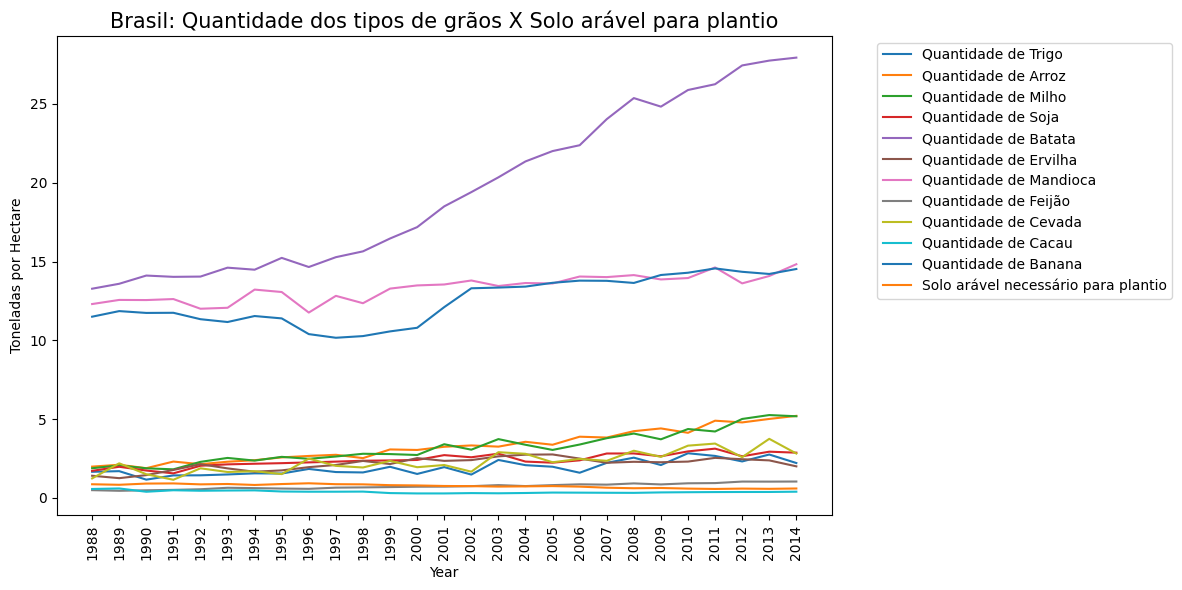

In [118]:
plt.figure(figsize=(12,6))

sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Trigo_Toneladas_por_Hectare, label = 'Quantidade de Trigo')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Arroz_Toneladas_por_Hectare, label = 'Quantidade de Arroz')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Milho_Toneladas_por_Hectare, label = 'Quantidade de Milho')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Soja_Toneladas_por_Hectare, label = 'Quantidade de Soja')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Batata_Toneladas_por_Hectare, label = 'Quantidade de Batata')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Ervilha_Toneladas_por_Hectare, label = 'Quantidade de Ervilha')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Mandioca_Toneladas_por_Hectare, label = 'Quantidade de Mandioca')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Feijão_Toneladas_por_Hectare, label = 'Quantidade de Feijão')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Cevada_Toneladas_por_Hectare, label = 'Quantidade de Cevada')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Cacau_Toneladas_por_Hectare, label = 'Quantidade de Cacau')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Banana_Toneladas_por_Hectare, label = 'Quantidade de Banana')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=df_key_crop_yields_BR.Terra_arável_necessária_para_produzir_quant_fixa_culturas, label = 'Solo arável necessário para plantio')

plt.title('Brasil: Quantidade dos tipos de grãos X Solo arável para plantio' , fontsize=15)
plt.legend()
plt.xticks(df_key_crop_yields_BR.Year,rotation=90)
plt.ylabel('Toneladas por Hectare')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Utilizando escala logarítmica

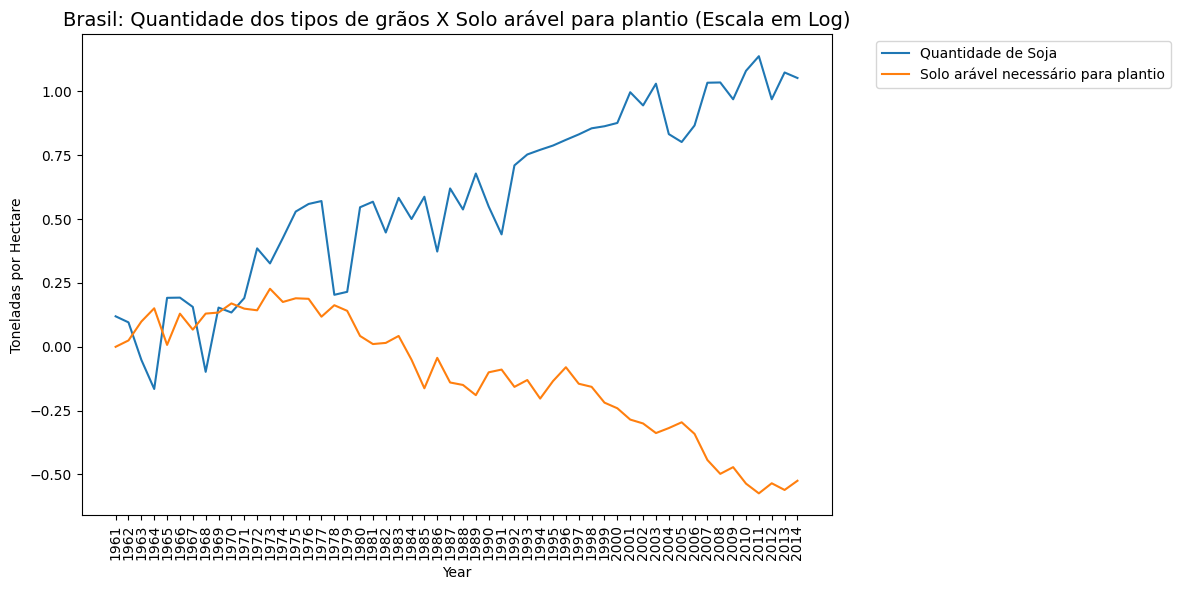

In [46]:
plt.figure(figsize=(12,6))

sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Soja_Toneladas_por_Hectare), label='Quantidade de Soja')
sns.lineplot(x=df_key_crop_yields_BR.Year, y=np.log(df_key_crop_yields_BR.Terra_arável_necessária_para_produzir_quant_fixa_culturas), label='Solo arável necessário para plantio')

plt.title('Brasil: Quantidade dos tipos de grãos X Solo arável para plantio (Escala em Log)', fontsize=14)
plt.legend()
plt.xticks(df_key_crop_yields_BR.Year, rotation=90)
plt.ylabel('Toneladas por Hectare')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posicionando a legenda fora do gráfico
plt.tight_layout()
plt.show()


In [ ]:
df_key_crop_yields_BR.head()

#**ESBOÇO DE RESOLUÇÃO DE EXERCÍCIOS**

# 1. Análise de Distribuição de Dados:

Vamos plotar histogramas para as quantidades de trigo, milho, soja, cacau e para o solo arável necessário para o plantio:


In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(df_key_crop_yields_BR['Trigo_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Trigo')

plt.subplot(2, 3, 2)
sns.histplot(df_key_crop_yields_BR['Milho_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Milho')

plt.subplot(2, 3, 3)
sns.histplot(df_key_crop_yields_BR['Soja_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Soja')

plt.subplot(2, 3, 4)
sns.histplot(df_key_crop_yields_BR['Cacau_Toneladas_por_Hectare'], kde=True)
plt.title('Distribuição de Cacau')

plt.subplot(2, 3, 5)
sns.histplot(df_key_crop_yields_BR['Terra_arável_necessária_para_produzir_quant_fixa_culturas'], kde=True)
plt.title('Distribuição de Solo Arável')

plt.tight_layout()
plt.show()

Segunda tentativa

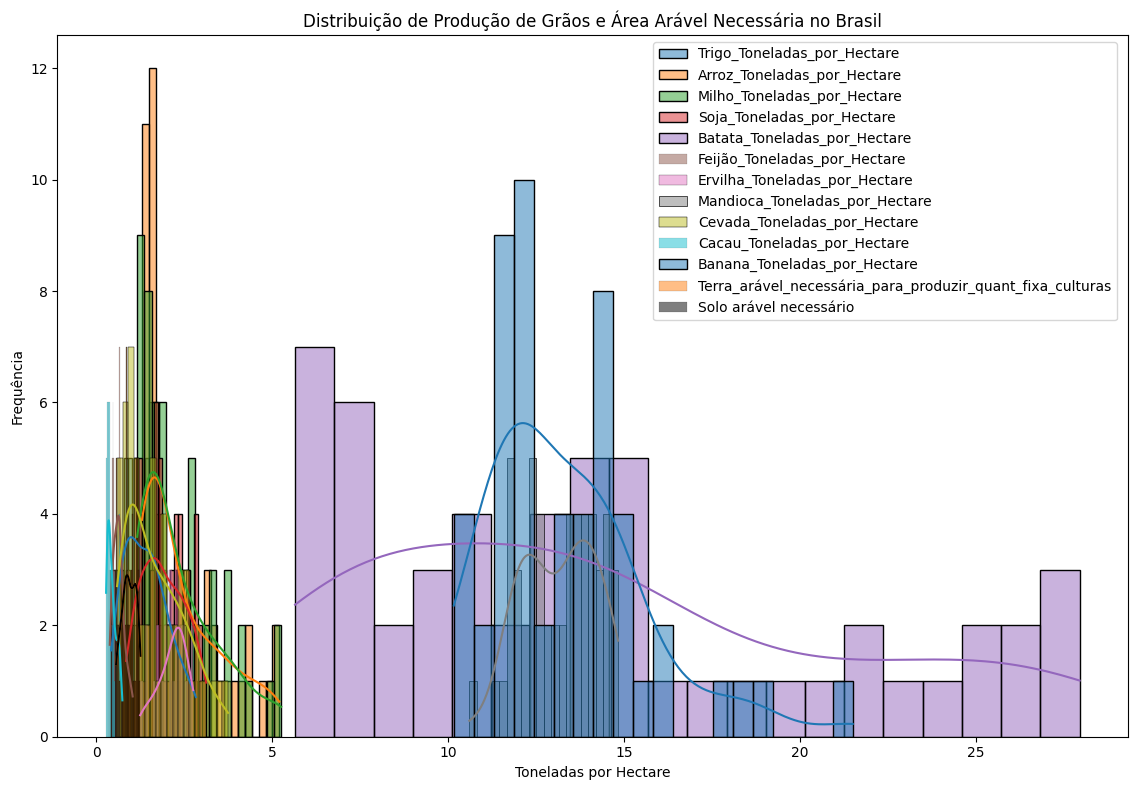

In [67]:
plt.figure(figsize=(12, 8))

# Histograma para cada variável de produção de grãos
for crop in df_key_crop_yields_BR.columns[3:]:
    sns.histplot(df_key_crop_yields_BR[crop], bins=20, kde=True, label=crop)

# Histograma para a área arável necessária
sns.histplot(df_key_crop_yields_BR['Terra_arável_necessária_para_produzir_quant_fixa_culturas'], bins=20, kde=True, color='black', label='Solo arável necessário')

plt.title('Distribuição de Produção de Grãos e Área Arável Necessária no Brasil')
plt.xlabel('Toneladas por Hectare')
plt.ylabel('Frequência')
plt.legend(bbox_to_anchor=(0.55, 1), loc='upper left')  # Posicionando a legenda fora do gráfico
plt.tight_layout()
plt.show()


# 2. Transformações de Dados

Podemos realizar a normalização dos dados utilizando o StandardScaler para padronizar as features:

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_key_crop_yields_BR[['Trigo_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare', 'Soja_Toneladas_por_Hectare', 'Cacau_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas']])
scaled_df = pd.DataFrame(scaled_data, columns=['Trigo_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare', 'Soja_Toneladas_por_Hectare', 'Cacau_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas'])
print("Dados Normalizados:")
print(scaled_df.head())


Segunda Tentativa

In [68]:
# Padronização dos dados de produção de grãos e área arável necessária
scaler = StandardScaler()
df_key_crop_yields_BR_scaled = scaler.fit_transform(df_key_crop_yields_BR.iloc[:, 3:])

# Convertendo o resultado da padronização de volta em um DataFrame
df_key_crop_yields_BR_scaled = pd.DataFrame(df_key_crop_yields_BR_scaled, columns=df_key_crop_yields_BR.columns[3:])


# 3. Análise de Tabelas de Contingência ou Agregações

Podemos realizar uma agregação dos dados por ano para entender a média das quantidades de cada cultura ao longo do tempo:

In [ ]:
dados_agregados = df_key_crop_yields_BR.groupby('Year').agg({
    'Trigo_Toneladas_por_Hectare': 'mean',
    'Milho_Toneladas_por_Hectare': 'mean',
    'Soja_Toneladas_por_Hectare': 'mean',
    'Cacau_Toneladas_por_Hectare': 'mean',
    'Terra_arável_necessária_para_produzir_quant_fixa_culturas': 'mean'
}).reset_index()
print("Agregação dos Dados por Ano:")
print(dados_agregados.head())


Segunda Tentativa

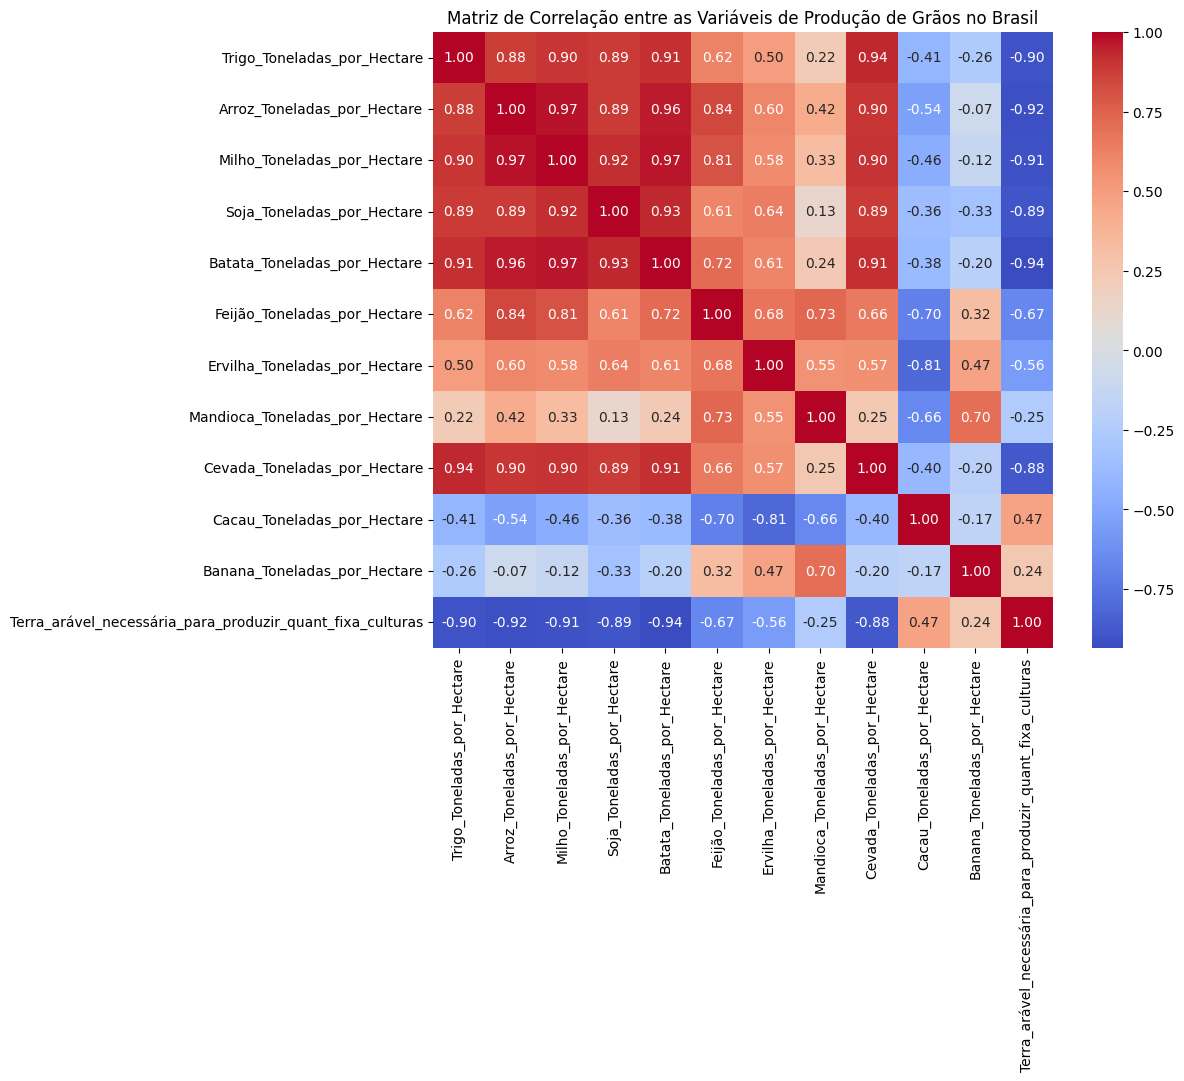

In [69]:
correlation_matrix = df_key_crop_yields_BR_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis de Produção de Grãos no Brasil')
plt.show()

# 4. Análise de Correlação

Podemos calcular a matriz de correlação entre as variáveis de interesse:

In [ ]:
correlacao_matriz = df_key_crop_yields_BR[['Trigo_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare', 'Soja_Toneladas_por_Hectare', 'Cacau_Toneladas_por_Hectare', 'Terra_arável_necessária_para_produzir_quant_fixa_culturas']].corr()
print("Matriz de Correlação:")
print(correlacao_matriz)


Segunda Tentativa

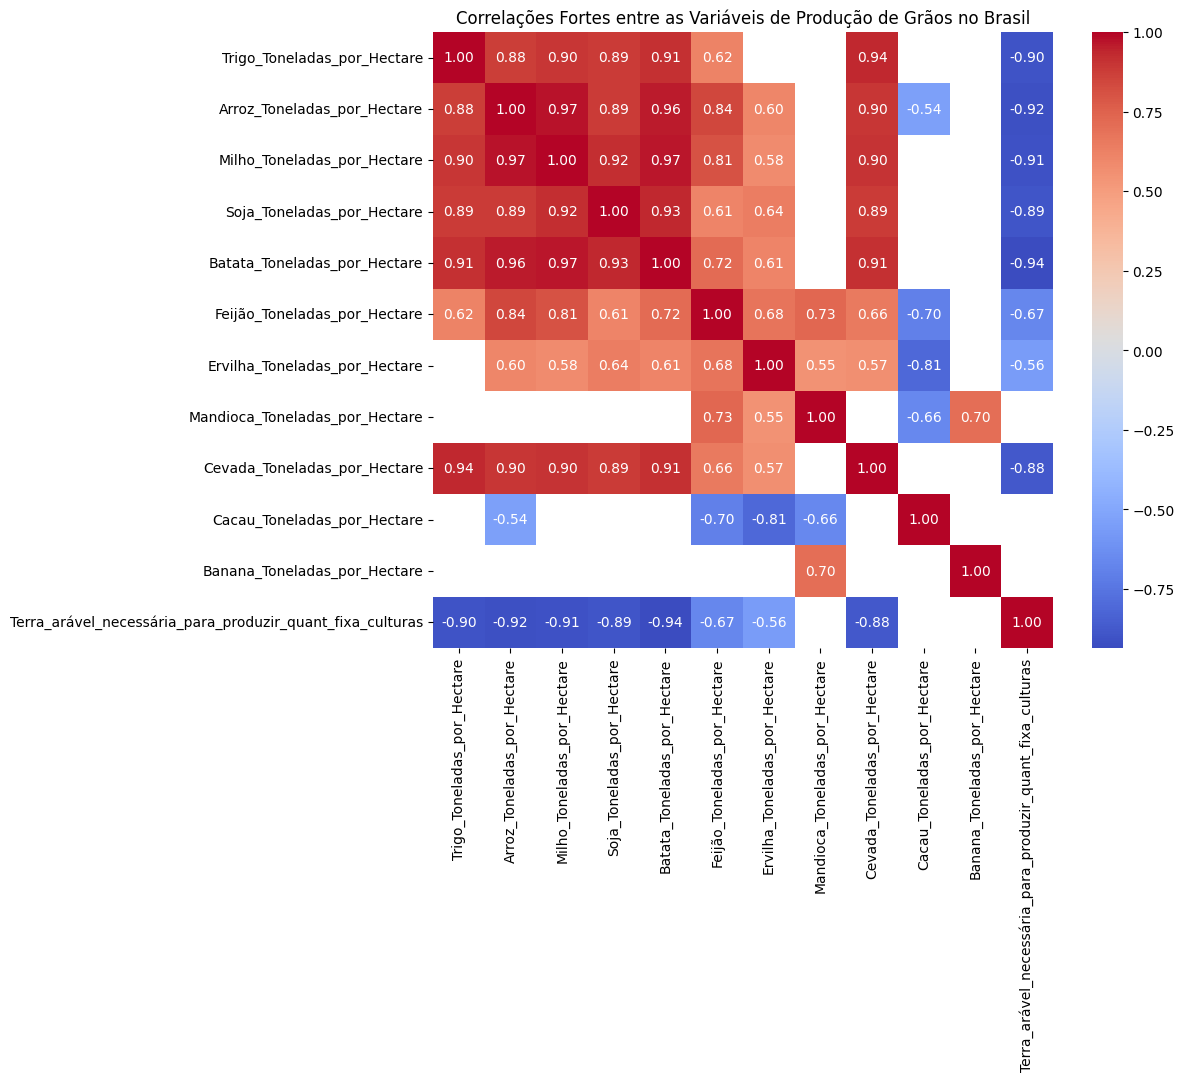

In [70]:
# Selecionando as correlações mais fortes (maiores que 0.5 em módulo)
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlações Fortes entre as Variáveis de Produção de Grãos no Brasil')
plt.show()


# 5. Análise de Informação Mútua ou Teste de Interdependência

Para uma análise de informação mútua ou teste de interdependência, podemos usar o método mutual_info_regression do sklearn.feature_selection para calcular a informação mútua entre as variáveis.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Calcular a informação mútua entre cada feature e a quantidade de terra arável necessária
mi_scores = mutual_info_regression(df_key_crop_yields_BR[['Trigo_Toneladas_por_Hectare', 'Milho_Toneladas_por_Hectare',
'Soja_Toneladas_por_Hectare', 'Cacau_Toneladas_por_Hectare']], df_key_crop_yields_BR['Terra_arável_necessária_para_produzir_quant_fixa_culturas'])
print("Informação Mútua entre as Variáveis:")
for i, score in enumerate(mi_scores):
    print(f"Variável {i+1}: {score}")

Segunda Tentativa

<ipython-input-78-467a1bfab22c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutual_info_df.index, y=mutual_info_df['Informação Mútua'], palette='viridis')


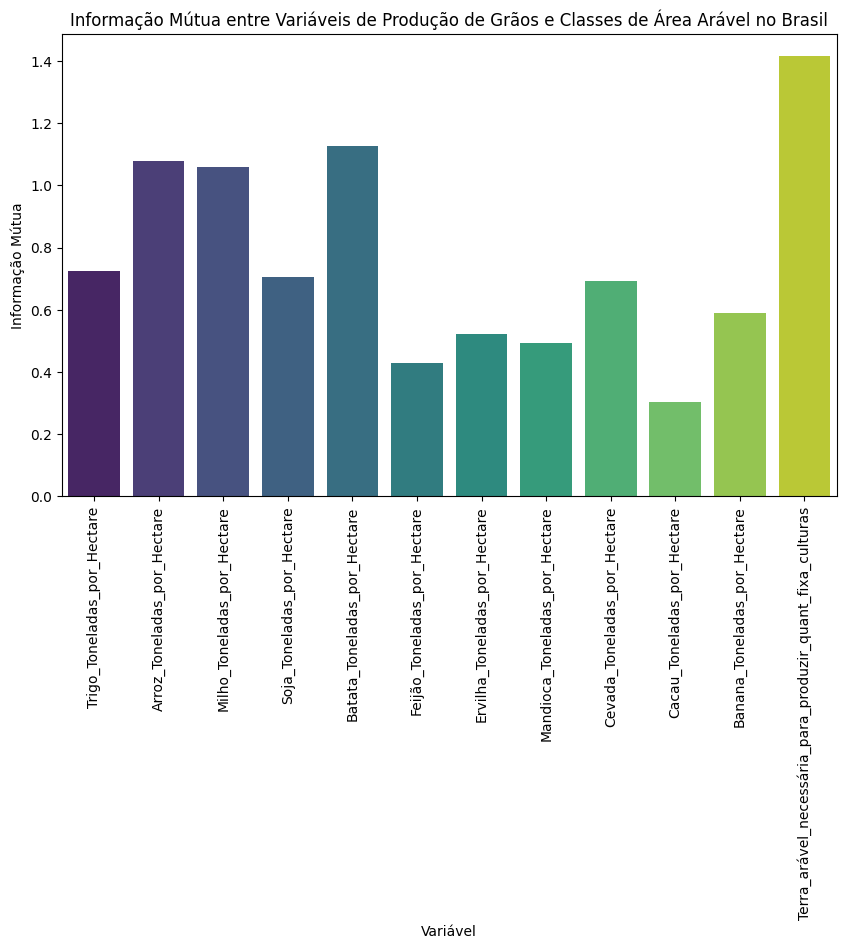

In [78]:
# Criando um DataFrame com os resultados
mutual_info_df = pd.DataFrame(mutual_info, index=df_key_crop_yields_BR_scaled.columns[:-1], columns=['Informação Mútua'])

# Visualizando a informação mútua
plt.figure(figsize=(10, 6))
sns.barplot(x=mutual_info_df.index, y=mutual_info_df['Informação Mútua'], palette='viridis')
plt.title('Informação Mútua entre Variáveis de Produção de Grãos e Classes de Área Arável no Brasil')
plt.xlabel('Variável')
plt.ylabel('Informação Mútua')
plt.xticks(rotation=90)
plt.show()

